<a href="https://colab.research.google.com/github/sesmael/ECGR-4105/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
###### Problem 1 ######
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the diabetes dataset
data = pd.read_csv('https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


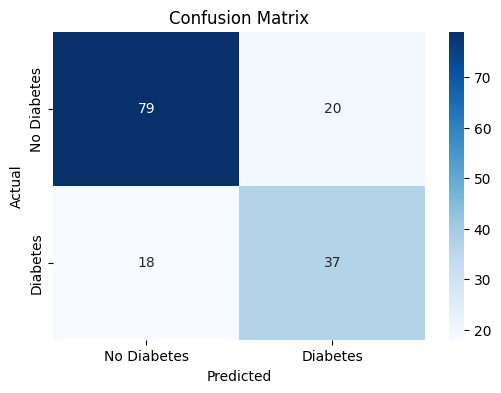

Accuracy: 0.7532
Precision: 0.6491
Recall: 0.6727
F1 Score: 0.6607


In [15]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# set the testing data to 20% and training to 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# initializing and training the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions and metrics
y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [16]:
###### Cancer dateset setup ######
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

(569, 30)

In [17]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
breast_labels = breast.target
breast_labels.shape
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [19]:
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [20]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.tail()

<ipython-input-20-f2289ac97c8a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_dataset['label'].replace(0, 'Benign',inplace=True)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


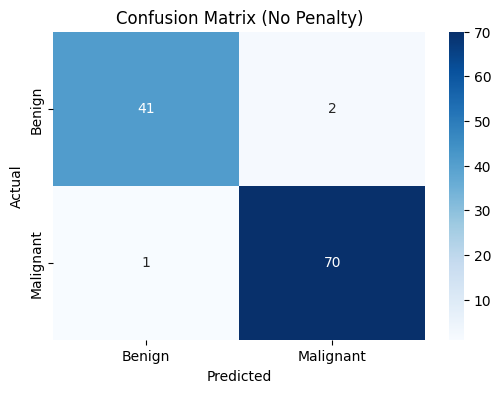

Metrics without penalty:
Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1 Score: 0.9790


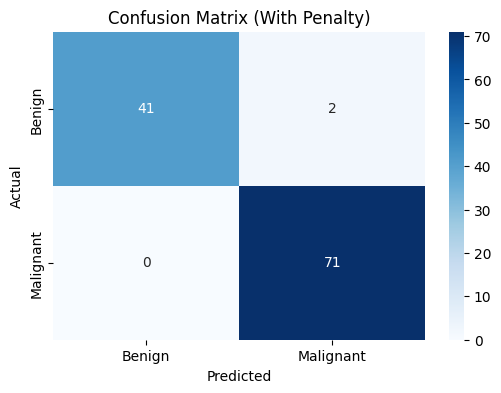

Metrics with penalty:
Accuracy: 0.9825
Precision: 0.9726
Recall: 1.0000
F1 Score: 0.9861


In [22]:
###### Problem 2 ######

# Split data into features and target
X = breast_input
y = breast_labels  # 0 is Benign, 1 is Malignant

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train logistic regression model without penalty
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix (No Penalty)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print metrics without penalty
print("Metrics without penalty:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Initialize and train logistic regression model with weight penalty (L2 regularization)
log_reg_penalty = LogisticRegression(max_iter=1000, penalty='l2', C=0.1)  # Smaller C adds stronger regularization
log_reg_penalty.fit(X_train_scaled, y_train)

# Make predictions with penalty
y_pred_penalty = log_reg_penalty.predict(X_test_scaled)

# Calculate performance metrics with penalty
accuracy_penalty = accuracy_score(y_test, y_pred_penalty)
precision_penalty = precision_score(y_test, y_pred_penalty)
recall_penalty = recall_score(y_test, y_pred_penalty)
f1_penalty = f1_score(y_test, y_pred_penalty)

# Confusion matrix with penalty
conf_matrix_penalty = confusion_matrix(y_test, y_pred_penalty)

# Plot confusion matrix with penalty
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_penalty, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix (With Penalty)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print metrics with penalty
print("Metrics with penalty:")
print(f"Accuracy: {accuracy_penalty:.4f}")
print(f"Precision: {precision_penalty:.4f}")
print(f"Recall: {recall_penalty:.4f}")
print(f"F1 Score: {f1_penalty:.4f}")

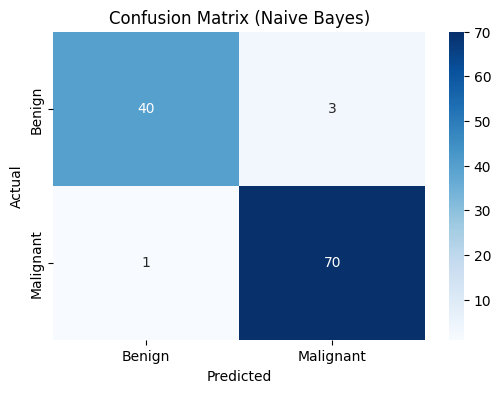

Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722


In [ ]:
###### Problem 3 ######
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize and train Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nb = naive_bayes.predict(X_test_scaled)

# Calculate performance metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Output performance metrics for Naive Bayes
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")

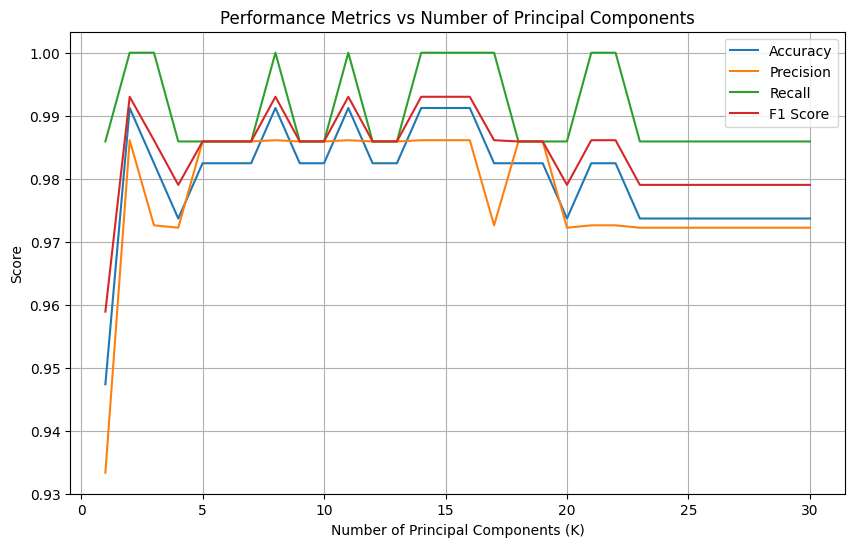

Optimal number of components (K): 2
Highest Accuracy: 0.9912


In [2]:
###### Problem 4 ######
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the breast cancer dataset
breast = load_breast_cancer()
X = breast.data
y = breast.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Variables to store the results
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Test for different values of K (number of principal components)
max_k = X.shape[1]  # The maximum number of components is the number of original features
for k in range(1, max_k + 1):
    # Apply PCA
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X_scaled)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Train Logistic Regression model
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)

    # Predict and calculate metrics
    y_pred = log_reg.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), accuracies, label='Accuracy')
plt.plot(range(1, max_k + 1), precisions, label='Precision')
plt.plot(range(1, max_k + 1), recalls, label='Recall')
plt.plot(range(1, max_k + 1), f1_scores, label='F1 Score')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Performance Metrics vs Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of components based on the highest accuracy
optimal_k = np.argmax(accuracies) + 1
print(f"Optimal number of components (K): {optimal_k}")
print(f"Highest Accuracy: {accuracies[optimal_k-1]:.4f}")


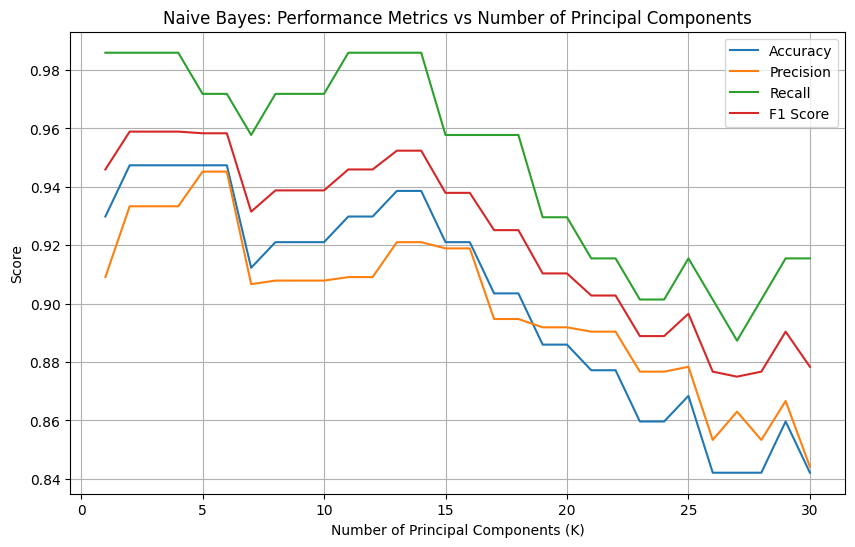

Optimal number of components (K) for Naive Bayes: 2
Highest Accuracy: 0.9474


In [5]:
# Import necessary libraries

from sklearn.naive_bayes import GaussianNB

# Load the breast cancer dataset
breast = load_breast_cancer()
X = breast.data
y = breast.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Variables to store the results
accuracies_nb = []
precisions_nb = []
recalls_nb = []
f1_scores_nb = []

# Test for different values of K (number of principal components)
max_k = X.shape[1]  # The maximum number of components is the number of original features
for k in range(1, max_k + 1):
    # Apply PCA
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X_scaled)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Train Naive Bayes classifier
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train, y_train)

    # Predict and calculate metrics
    y_pred_nb = nb_classifier.predict(X_test)
    accuracies_nb.append(accuracy_score(y_test, y_pred_nb))
    precisions_nb.append(precision_score(y_test, y_pred_nb))
    recalls_nb.append(recall_score(y_test, y_pred_nb))
    f1_scores_nb.append(f1_score(y_test, y_pred_nb))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), accuracies_nb, label='Accuracy')
plt.plot(range(1, max_k + 1), precisions_nb, label='Precision')
plt.plot(range(1, max_k + 1), recalls_nb, label='Recall')
plt.plot(range(1, max_k + 1), f1_scores_nb, label='F1 Score')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Naive Bayes: Performance Metrics vs Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of components based on the highest accuracy
optimal_k_nb = np.argmax(accuracies_nb) + 1
print(f"Optimal number of components (K) for Naive Bayes: {optimal_k_nb}")
print(f"Highest Accuracy: {accuracies_nb[optimal_k_nb-1]:.4f}")
